# 인덱스 지수화
* 기준일자 : 2008-01-02 ~ 2017-12-29
* KOSPI200/ S&P500

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



# Data Load

## read_excel()
* https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
* pandas.read_excel(io, sheet_name=0, *, header=0, names=None, index_col=None, usecols=None, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=_NoDefault.no_default, date_format=None, thousands=None, decimal='.', comment=None, skipfooter=0, storage_options=None, dtype_backend=_NoDefault.no_default)

In [2]:
df = pd.read_excel("./실습04_S&P500-KOSPI200.xlsx", sheet_name='sheet1', parse_dates=[0], index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2592 entries, 2008-01-02 to 2017-12-29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S&P500       2592 non-null   float64
 1   KOSPI200     2592 non-null   float64
 2   S&P500지수화    2592 non-null   float64
 3   KOSPI200지수화  2592 non-null   float64
dtypes: float64(4)
memory usage: 101.2 KB


In [3]:
df.head()

,S&P500,KOSPI200,S&P500지수화,KOSPI200지수화
2008-01-02,1447.16,235.30,100.000000,100.000000
2008-01-03,1447.16,234.67,100.000000,99.732257
2008-01-04,1411.63,235.77,97.544846,100.199745
2008-01-07,1416.18,231.00,97.859255,98.172546
2008-01-08,1390.19,230.34,96.063324,97.892053


<AxesSubplot: >

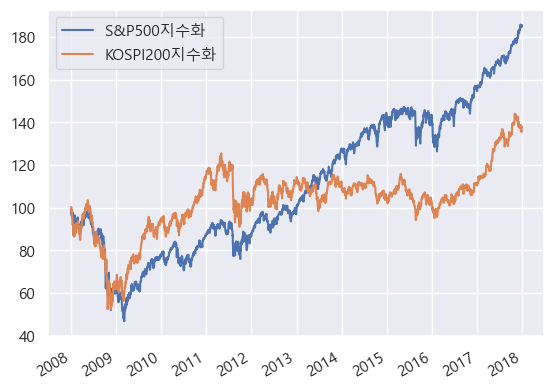

In [4]:
df[['S&P500지수화','KOSPI200지수화']].plot()

## API 사용
* pandas_datareader / yfinance
    * S&P 500 (^GSPC)
    * KOSPI 200 Index (^KS200)
    * 기준일자 : 2008-01-02 ~ 2017-12-29

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [6]:
sp_df = pdr.get_data_yahoo('^GSPC', '2008-01-02', '2017-12-29')
ks_df = pdr.get_data_yahoo('^KS200', '2008-01-02', '2017-12-29')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
sp_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000
2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000


In [8]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2008-01-02 to 2017-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [9]:
df = pd.concat( [sp_df[['Close']], ks_df[['Close']]], axis=1)
df.columns = ['sp','kospi']
df.head()

,sp,kospi
Date,,
2008-01-02,1447.160034,235.300003
2008-01-03,1447.160034,234.669998
2008-01-04,1411.630005,235.770004
2008-01-07,1416.180054,231.000000
2008-01-08,1390.189941,230.339996


## 지수(index)화
* =(B2/$B$2) * 100
* <font color=red size=4><b>지수 = (현재가 / 기준가) * 100
    * 2008-01-02	1447.160034	235.300003

In [10]:
df.iloc[0,0]

1447.1600341796875

In [11]:
# df.loc[pd.to_datetime('2008-01-02')]
df.loc['2008-01-02', 'sp']

1447.1600341796875

In [12]:
df['sp_idx']    = (df['sp']   /df.iloc[0,0]) * 100
df['kospi_idx'] = (df['kospi']/df.iloc[0,1]) * 100
df.head()

,sp,kospi,sp_idx,kospi_idx
Date,,,,
2008-01-02,1447.160034,235.300003,100.000000,100.000000
2008-01-03,1447.160034,234.669998,100.000000,99.732255
2008-01-04,1411.630005,235.770004,97.544844,100.199746
2008-01-07,1416.180054,231.000000,97.859257,98.172544
2008-01-08,1390.189941,230.339996,96.063318,97.892050


<AxesSubplot: xlabel='Date'>

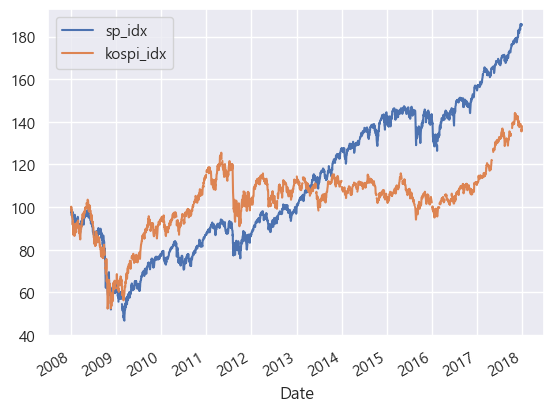

In [13]:
df[['sp_idx','kospi_idx']].plot()

# 수익률 vs. 지수화

In [14]:
cpdf = df[['sp','kospi']]
cpdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2564 entries, 2008-01-02 to 2017-12-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      2517 non-null   float64
 1   kospi   2430 non-null   float64
dtypes: float64(2)
memory usage: 124.6 KB


In [15]:
cpdf = cpdf.fillna(method='ffill')
cpdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2564 entries, 2008-01-02 to 2017-12-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      2564 non-null   float64
 1   kospi   2564 non-null   float64
dtypes: float64(2)
memory usage: 124.6 KB


In [16]:
cpdf = cpdf.round(0).astype(int)
cpdf.head()

,sp,kospi
Date,,
2008-01-02,1447,235
2008-01-03,1447,235
2008-01-04,1412,236
2008-01-07,1416,231
2008-01-08,1390,230


## 지수화 == 기간수익률
* 가정 : 첫날(2008-01-02)를 기준으로 100으로 한다

In [17]:
# cpdf['sp지수화']    =  (cpdf['sp']    / 1447) * 100 
# cpdf['kospi지수화'] =  (cpdf['kospi'] / 235 ) * 100 
cpdf['sp지수화']    =  (cpdf['sp']   /cpdf.iloc[0,0]) * 100 
cpdf['kospi지수화'] =  (cpdf['kospi']/cpdf.iloc[0,1]) * 100 
cpdf.head()

,sp,kospi,sp지수화,kospi지수화
Date,,,,
2008-01-02,1447,235,100.000000,100.000000
2008-01-03,1447,235,100.000000,100.000000
2008-01-04,1412,236,97.581202,100.425532
2008-01-07,1416,231,97.857636,98.297872
2008-01-08,1390,230,96.060815,97.872340


## 일간 변동가(price)
* 변화량 : 현재가격 - N일가격 
* <font size=4 color=red><b> N일 대비 가격 증감에 주로 사용
* <font size=4 color=blue><b> df['close'].diff(1) = </font>  <font size=4 color=red><b> df['close'] - df['colse'].shift(1)

In [18]:
# cpdf[['sp일간변동가','kospi일간변동가']] =  cpdf[['sp','kospi']].diff(1)
cpdf[['kospi일간변동가']] =  cpdf[['kospi']].diff(1)
cpdf.head()

,sp,kospi,sp지수화,kospi지수화,kospi일간변동가
Date,,,,,
2008-01-02,1447,235,100.000000,100.000000,NaN
2008-01-03,1447,235,100.000000,100.000000,0.0
2008-01-04,1412,236,97.581202,100.425532,1.0
2008-01-07,1416,231,97.857636,98.297872,-5.0
2008-01-08,1390,230,96.060815,97.872340,-1.0


## 일간 변동률(rate)
* 백분위 변화율 : (현재가격 - N일가격 ) / N일가격
* <font size=4 color=red><b>전일 대비 수익률에 주로 사용

In [19]:
# cpdf[['sp일간변동률','kospi일간변동률']] = cpdf[['sp','kospi']].pct_change()
cpdf[['kospi일간변동률']] = cpdf[['kospi']].pct_change()
cpdf.head()

,sp,kospi,sp지수화,kospi지수화,kospi일간변동가,kospi일간변동률
Date,,,,,,
2008-01-02,1447,235,100.000000,100.000000,NaN,NaN
2008-01-03,1447,235,100.000000,100.000000,0.0,0.000000
2008-01-04,1412,236,97.581202,100.425532,1.0,0.004255
2008-01-07,1416,231,97.857636,98.297872,-5.0,-0.021186
2008-01-08,1390,230,96.060815,97.872340,-1.0,-0.004329


In [20]:
# cpdf[['sp일간변동률','kospi일간변동률']] = cpdf[['sp','kospi']].pct_change()
cpdf[['kospi지수화_일간변동률']] = cpdf[['kospi지수화']].pct_change()
cpdf.head()

,sp,kospi,sp지수화,kospi지수화,kospi일간변동가,kospi일간변동률,kospi지수화_일간변동률
Date,,,,,,,
2008-01-02,1447,235,100.000000,100.000000,NaN,NaN,NaN
2008-01-03,1447,235,100.000000,100.000000,0.0,0.000000,0.000000
2008-01-04,1412,236,97.581202,100.425532,1.0,0.004255,0.004255
2008-01-07,1416,231,97.857636,98.297872,-5.0,-0.021186,-0.021186
2008-01-08,1390,230,96.060815,97.872340,-1.0,-0.004329,-0.004329


## 누적 일간 변동가(cumsum)

In [21]:
# cpdf[['sp일간변동가','kospi일간변동가']] = cpdf[['sp','kospi']].diff(1).cumsum()
cpdf[['kospi누적일간변동가']] = cpdf[['kospi']].diff(1).cumsum()
cpdf.head()

,sp,kospi,sp지수화,kospi지수화,kospi일간변동가,kospi일간변동률,kospi지수화_일간변동률,kospi누적일간변동가
Date,,,,,,,,
2008-01-02,1447,235,100.000000,100.000000,NaN,NaN,NaN,NaN
2008-01-03,1447,235,100.000000,100.000000,0.0,0.000000,0.000000,0.0
2008-01-04,1412,236,97.581202,100.425532,1.0,0.004255,0.004255,1.0
2008-01-07,1416,231,97.857636,98.297872,-5.0,-0.021186,-0.021186,-4.0
2008-01-08,1390,230,96.060815,97.872340,-1.0,-0.004329,-0.004329,-5.0


## 누적 일간 변동률(cumprod)

In [22]:
# cpdf[['sp누적일간변동률','kospi누적일간변동률']] = (1+cpdf[['sp일간변동률','kospi일간변동률']]).cumprod()-1
r = cpdf[['kospi']].pct_change()
cpdf[['kospi누적일간변동률']] = (1+r).cumprod()-1
cpdf.head()

,sp,kospi,sp지수화,kospi지수화,kospi일간변동가,kospi일간변동률,kospi지수화_일간변동률,kospi누적일간변동가,kospi누적일간변동률
Date,,,,,,,,,
2008-01-02,1447,235,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
2008-01-03,1447,235,100.000000,100.000000,0.0,0.000000,0.000000,0.0,0.000000
2008-01-04,1412,236,97.581202,100.425532,1.0,0.004255,0.004255,1.0,0.004255
2008-01-07,1416,231,97.857636,98.297872,-5.0,-0.021186,-0.021186,-4.0,-0.017021
2008-01-08,1390,230,96.060815,97.872340,-1.0,-0.004329,-0.004329,-5.0,-0.021277


## 연복리 수익률(CAGR: (Compound Annual Growth Rate)
* 투자 기간에 대한 투자 수익률
* $ (1+r)^N  = 기간수익률 $  : 기간(N)동안에 총 얼마를 받았는가?
* $ 연복리수익률(r) = 기간수익률^{1 \over N} -1  $
    * <font color=red><b>$단리 = 원금 × (1 + 년이율 × 기간) $
    * <font color=red><b>$복리 = 원금 × (1 + 년이율)^{기간} $  

* 투자기간

In [23]:
cpdf.index.min(), cpdf.index.max() #약10년

(Timestamp('2008-01-02 00:00:00'), Timestamp('2017-12-28 00:00:00'))

In [24]:
diff = cpdf.index[-1] - cpdf.index[0]
N = diff.days / 365
N

9.994520547945205

* 기간수익률(배) 
     * df['기간수익률(배)'] = df['종가'] / df['종가'][0]

In [25]:
print(f"최초:{cpdf['kospi'][0]}   만기:{cpdf['kospi'][-1]}")  
cpdf['kospi'][-1] / cpdf['kospi'][0]      #---------------자산볓배

최초:235   만기:325


1.3829787234042554

In [26]:
cpdf.tail(1)                          #----------------누적이자

,sp,kospi,sp지수화,kospi지수화,kospi일간변동가,kospi일간변동률,kospi지수화_일간변동률,kospi누적일간변동가,kospi누적일간변동률
Date,,,,,,,,,
2017-12-28,2688,325,185.763649,138.297872,5.0,0.015625,0.015625,90.0,0.382979


* 연복리 수익률(r)
    * (1+r) ** N = 기간수익률(배)
    * r = 기간수익률(배) ** (1/N) - 1

In [27]:
N = 10
기간수익률_몇배 = cpdf['kospi누적일간변동률'][-1] + 1
연복리수익률r = (기간수익률_몇배 ** (1/N))-1
기간수익률_몇배, 연복리수익률r

(1.3829787234042532, 0.03295535127647109)

In [28]:
N = 10
기간수익률_몇배 = cpdf['kospi'][-1] / cpdf['kospi'][0] 
연복리수익률r = (기간수익률_몇배 ** (1/N))-1
기간수익률_몇배, 연복리수익률r

(1.3829787234042554, 0.03295535127647109)

In [29]:
(0.032 * 100) # %

3.2

## 누적 로그 수익률  
* <font color=red><b>log(1+r) 
* <font color=red><b>log(1+ 가격.pct_change())
* logA + logB = log(A*B)
* <font color=red><b> 로그 수익률은 합산(cumsum())</font></b> --> 계산하기 쉬움
* 100 --> 150(50%)  --> 100(-33%) : 원금의 비율을 왜곡 없이 보기 위함
    * 자산의 실가치 확인

In [30]:
# cpdf['kospi로그수익률']    = np.log(1+ cpdf['kospi'].pct_change() ) 
cpdf[['sp로그수익률','kospi로그수익률']]    = np.log(1+ cpdf[['sp','kospi']].pct_change() ) 
cpdf.head()

,sp,kospi,sp지수화,kospi지수화,kospi일간변동가,kospi일간변동률,kospi지수화_일간변동률,kospi누적일간변동가,kospi누적일간변동률,sp로그수익률,kospi로그수익률
Date,,,,,,,,,,,
2008-01-02,1447,235,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,1447,235,100.000000,100.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2008-01-04,1412,236,97.581202,100.425532,1.0,0.004255,0.004255,1.0,0.004255,-0.024485,0.004246
2008-01-07,1416,231,97.857636,98.297872,-5.0,-0.021186,-0.021186,-4.0,-0.017021,0.002829,-0.021414
2008-01-08,1390,230,96.060815,97.872340,-1.0,-0.004329,-0.004329,-5.0,-0.021277,-0.018532,-0.004338


In [31]:
cpdf['kospi누적로그수익률'] = np.log( 1+cpdf['kospi'].pct_change() ).cumsum() 
cpdf.head()

,sp,kospi,sp지수화,kospi지수화,kospi일간변동가,kospi일간변동률,kospi지수화_일간변동률,kospi누적일간변동가,kospi누적일간변동률,sp로그수익률,kospi로그수익률,kospi누적로그수익률
Date,,,,,,,,,,,,
2008-01-02,1447,235,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,1447,235,100.000000,100.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2008-01-04,1412,236,97.581202,100.425532,1.0,0.004255,0.004255,1.0,0.004255,-0.024485,0.004246,0.004246
2008-01-07,1416,231,97.857636,98.297872,-5.0,-0.021186,-0.021186,-4.0,-0.017021,0.002829,-0.021414,-0.017168
2008-01-08,1390,230,96.060815,97.872340,-1.0,-0.004329,-0.004329,-5.0,-0.021277,-0.018532,-0.004338,-0.021506


## 포트폴리오 기대수익률(expected return)
* <font color=red><b>포트폴리오의 각 자산에 대한 예상 수익률의 가중평균(기하평균) -> np.log(x)의 평균    
* 과거 수익률을 바탕으로 미래 수익률을 추정한 값
* 일반적으로 로그 수익률을 많이 활용
    * $로그수익률=\ln (\frac{나중\, \, 주가}{처음\, \, 주가}) = np.log(1+r)$
    * r = (현재가격 - 이전가격) / 이전가격
    * <font color=red><b>기하평균 : f(n) = ln x일 때의 일반화된 f-평균
<img width=400 src="http://www.dentalnews.or.kr/data/photos/20210414/art_16178427616153_62e095.jpg">


* 기대수익률 : 로그의 기하평균(log.mean())
* 포트폴리오 기대수익률
    * 각 자산별로 기대수익률에 비중을 내적해서 계산(기대수익률*가중치)
    * v.dot(w) -->  $v\, ⋅\, w=1\times 4+2\times 5+3\times 6$

* <font color=red size=4><b>포트폴리오 기대수익률(기하평균)</b></font> 
    * == <b><font color=blue size=4>로그수익률</font> .mean()</b>
    * == <b><font color=blue size=4>log(1+가격.pct_change())</font>.mean()</b>

In [32]:
r = cpdf[['sp','kospi']].pct_change()
np.log( 1+r ).mean() 

sp       0.000242
kospi    0.000127
dtype: float64

In [33]:
cpdf[['sp로그수익률','kospi로그수익률']].mean() 

sp로그수익률       0.000242
kospi로그수익률    0.000127
dtype: float64

* ret_df
<pre>
r = cpdf[['sp','kospi']].pct_change()
ret_df = np.log(1+ r)

In [34]:
r = cpdf[['sp','kospi']].pct_change()
ret_df = np.log(1+ r)
ret_df.mean()

sp       0.000242
kospi    0.000127
dtype: float64

* 년간 기대수익률 == 일간 기대수익률 * 252 

In [35]:
cpdf[['sp로그수익률','kospi로그수익률']].mean()  * 252

sp로그수익률       0.060891
kospi로그수익률    0.031880
dtype: float64

In [36]:
ret_df.mean() * 252 

sp       0.060891
kospi    0.031880
dtype: float64

* 포트폴리오 연간 기대수익률 : (ret_df.mean() * 252).values

In [37]:
w = [0.3, 0.7]
er = cpdf[['sp로그수익률','kospi로그수익률']].mean()  * 252
print( np.dot(er, w) )

0.040583430971053415


In [38]:
w = [0.7, 0.3]
er = cpdf[['sp로그수익률','kospi로그수익률']].mean()  * 252
print( np.dot(er, w) )

0.052188028289843605


## 포트폴리오 리스크
* 리스크 : df['sp'].std()
* 포트폴리오 리스크
    * 공분산행렬을 이용 여러 종목의 리스크를 계산
    * np.dot(np.dot(df.cov(), W), W.T)
    * $\left[\begin{matrix}VAR[S_1]&COV[S_1,S_2]&\cdots &COV[S_1,S_N]\\COV[S_2,S_1]&VAR[S_2]&\cdots &COV[S_2,S_N]\\\vdots &\vdots &\ddots &\vdots \\COV[S_N,S_1]&COV[S_N,S_2]&\cdots &VAR[S_N]\end{matrix}\right]$

    * <font color=red><b>$\sigma _p^2=\omega \ C\ \omega ^{\top }$

* 일간 리스크 
* == np.log(1+ r).std() == 로그수익률.std() == ret_df.std()

In [39]:
r = cpdf[['sp','kospi']].pct_change()
# ret_df = np.log(1+ r)
np.log(1+ r).std()

sp       0.012765
kospi    0.012869
dtype: float64

In [40]:
cpdf[['sp로그수익률','kospi로그수익률']].std()

sp로그수익률       0.012765
kospi로그수익률    0.012869
dtype: float64

In [41]:
r = cpdf[['sp','kospi']].pct_change()
ret_df = np.log(1+ r)
ret_df.std() 

sp       0.012765
kospi    0.012869
dtype: float64

In [42]:
r = cpdf[['sp','kospi']].pct_change() 
# ret_df = np.log(1+ r)
print( np.log(1+ r).cov() )                #공분산행렬
print( np.sqrt(np.log(1+ r).cov()) )       #표준편차

             sp     kospi
sp     0.000163  0.000036
kospi  0.000036  0.000166
             sp     kospi
sp     0.012765  0.006025
kospi  0.006025  0.012869


In [43]:
cov_df = ret_df.cov()
print("공분산행렬의 분산제곱:\n",  np.sqrt(cov_df.iloc[0,0]), np.sqrt(cov_df.iloc[1,1])  )
print("로그수익률 표준편차:\n",  ret_df.std().values )  

공분산행렬의 분산제곱:
 0.012764699929098233 0.012869023796732885
로그수익률 표준편차:
 [0.0127647  0.01286902]


* 년간 리스크 : ret_df.std() * np.sqrt(252)

In [44]:
r = cpdf[['sp','kospi']].pct_change()
# ret_df = np.log(1+ r)
np.log(1+ r).std() *  np.sqrt(252)

sp       0.202633
kospi    0.204289
dtype: float64

In [45]:
cpdf[['sp로그수익률','kospi로그수익률']].std()  * np.sqrt(252)

sp로그수익률       0.202633
kospi로그수익률    0.204289
dtype: float64

In [46]:
r = cpdf[['sp','kospi']].pct_change()
ret_df = np.log(1+ r)
ret_df.std() * np.sqrt(252)

sp       0.202633
kospi    0.204289
dtype: float64

In [47]:
np.sqrt(ret_df.cov()*252)

,sp,kospi
sp,0.202633,0.095647
kospi,0.095647,0.204289


* <font color=red><b>포트폴리오 가중치 적용 - 년간 리스크
    * <font color=red><b>$\sigma _p^2=\omega \ C\ \omega ^{\top }$

In [48]:
w = np.array([1.0, 0])
C = ret_df.cov()*252
print(   np.dot(w, C) ) 
portfolio_var = np.dot( np.dot(w, C) , w.T) 
portfolio_std = np.sqrt(portfolio_var)
portfolio_std

[0.04106027 0.00914836]


0.20263332943654644

In [49]:
w = np.array([0, 1.0])
C = ret_df.cov()*252
print(   np.dot(w, C) ) 
portfolio_var = np.dot( np.dot(w, C) , w.T) 
portfolio_std = np.sqrt(portfolio_var)
portfolio_std

[0.00914836 0.04173417]


0.20428941949396467

In [50]:
w = np.array([0.5, 0.5])
C = ret_df.cov()*252
print(   np.dot(w, C) ) 
portfolio_var = np.dot( np.dot(w, C) , w.T) 
portfolio_std = np.sqrt(portfolio_var)
portfolio_std

[0.02510432 0.02544127]


0.15897418138113267

## 포트폴리오 성과지표
* <font color=red><b>샤프지수(Sharpe index) </b></font>
    * (기대수익률 - 벤치마크수익률)의 기대값을 (기대수익률 - 벤치마크수익률)의 표준편차로 나눈 것
    * <b>(수익률-무위험수익률) / 리스크  --> <font color=red>수익률/표준편차</font></b>
    * <font color=red><b>샤프지수가 높다 == 수익률이 높다 == 위험이 적다 == 더 좋은 포트폴리오

In [51]:
r = cpdf[['sp','kospi']].pct_change()


In [54]:
w = np.array([1.0, 0])  #0.30
w = np.array([0, 1.0])  #0.15
r = cpdf[['sp','kospi']].pct_change()
연간기대수익률 = np.log(1+ r).mean() * 252
returns_평균 = np.dot(w, 연간기대수익률) 

연간공분산행렬 = np.log(1+ r).cov() * 252
risk_편차    = np.sqrt(np.dot(w.T, np.dot(연간공분산행렬, w))) 
sharp   =  returns_평균 / risk_편차
sharp   # 샤프지수가 높다 == 수익률이 높다 == 위험이 적다 == 더 좋은 포트폴리오

0.1560530303572702